<a href="https://colab.research.google.com/github/rawatpremsingh999/tensorflow-coursera/blob/master/coursera_4104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot_series(time, series, format = '-'):
  plt.figure(figsize=(8, 5))
  plt.plot(time, series, format)
  plt.xlabel('time')
  plt.ylabel('value')
  plt.grid(True)

In [9]:
def trend(time, slope = 0):
  return slope * time

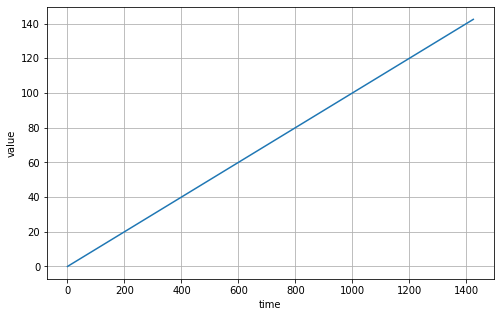

In [10]:
time = np.arange(4 * 356 + 1)
baseline = 10
series = trend(time, 0.1)
plot_series(time, series)
plt.show()

In [11]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi),
                  1/np.exp(3 * season_time))
  

def seasonality(time, period, amplitude = 1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

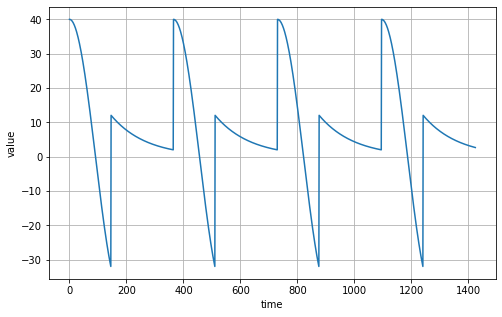

In [12]:
baseline = 10
amplitude = 40
series = seasonality(time, period= 365, amplitude= amplitude)
plot_series(time, series)
plt.show()

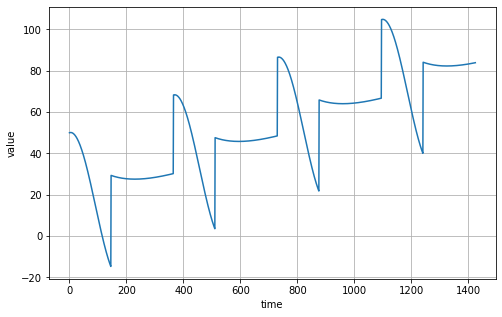

In [14]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude= amplitude)
plot_series(time, series)
plt.show()

In [15]:
def noise(time, noise_level = 1, seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

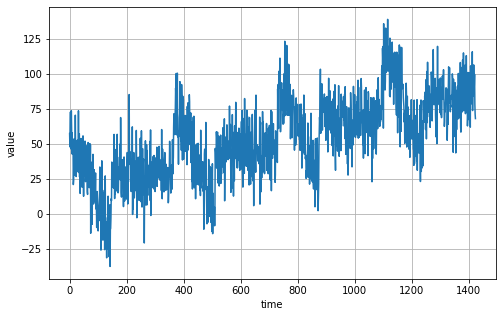

In [16]:
noise_level = 15
noisy_series = series + noise(time, noise_level, seed = 42)
plot_series(time, noisy_series)
plt.show()

In [22]:
def autocorrelation(time, amplitude, seed = None):
  rnd = np.random.RandomState(seed)
  phi_1 = 0.5
  phi_2 = -0.1
  ar = rnd.randn(len(time) + 50)
  ar[:50] = 100
  for step in range(50, len(time) + 50):
    ar[step] += phi_1 * ar[step - 50]
    ar[step] += phi_2 * ar[step - 33]
  return ar[50:] + amplitude

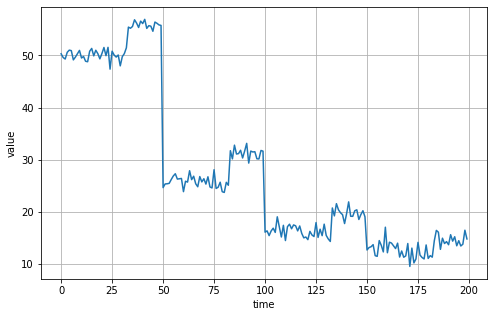

In [23]:
series = autocorrelation(time, 10, seed = 42)
plot_series(time[:200], series[:200])
plt.show()

In [24]:
def autocorrelation(time, amplitude, seed = None):
  rnd = np.random.RandomState(seed)
  phi = 0.8
  ar = rnd.randn(len(time) + 1)
  for step in range(1, len(time) + 1):
    ar[step] += phi * ar[step - 1]
  return ar[1:] * amplitude

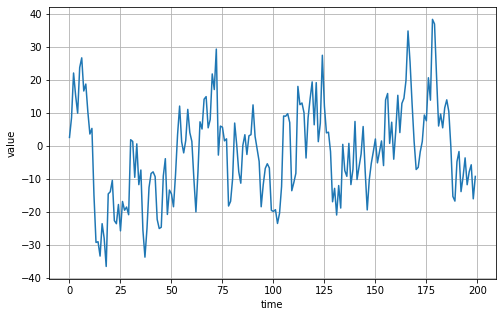

In [25]:
series = autocorrelation(time, 10, seed = 42)
plot_series(time[:200], series[:200])
plt.show()

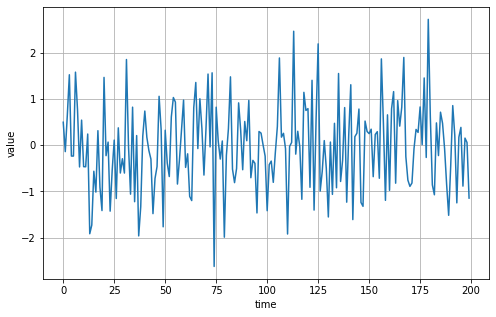

In [26]:
series = noise(time, seed = 42)
plot_series(time[:200], series[:200])
plt.show()

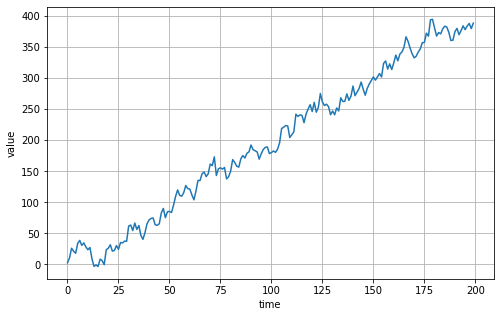

In [27]:
series = autocorrelation(time, 10, seed = 42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

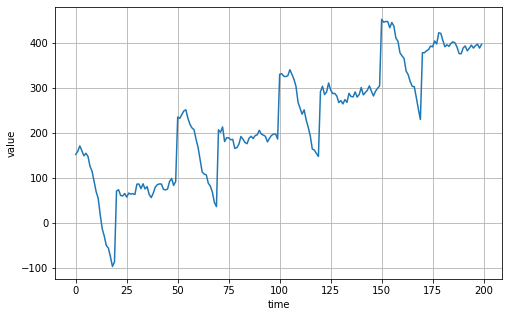

In [28]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

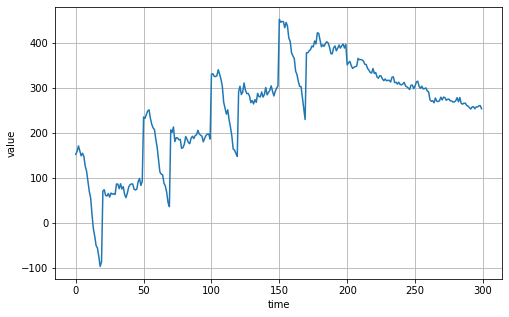

In [30]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
plot_series(time[:300], series[:300])
plt.show()

In [36]:
def impulses(time, num_impulses, amplitude=1, seed = None):
  rnd = np.random.RandomState(seed)
  impulse_indices = rnd.randint(len(time), size = 10)
  series = np.zeros(len(time))
  for index in impulse_indices:
    series[index] += rnd.rand() * amplitude
  return series

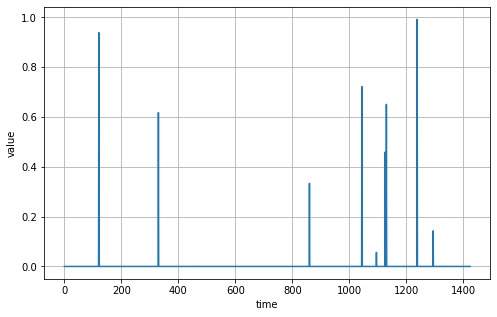

In [37]:
series = impulses(time, 10, seed=42)
plot_series(time, series)
plt.show()

In [38]:
def autocorrelation(source, phi_s):
  ar = source.copy()
  max_lag = len(phi_s)
  for step, value in enumerate(source):
    for lag, phi in phi_s.items():
      if step - lag > 0:
        ar[step] += phi * ar[step - lag]
  return ar

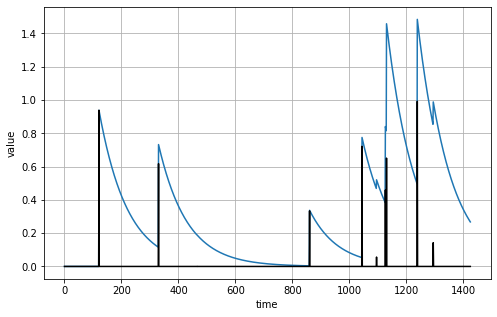

In [39]:
signal = impulses(time, 10, seed = 42)
series = autocorrelation(signal, {1: 0.99})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

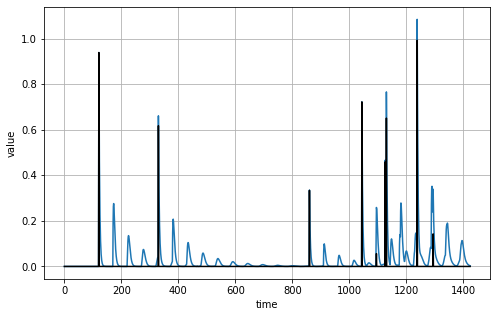

In [40]:
signal = impulses(time, 10, seed = 42)
series = autocorrelation(signal, {1: 0.70, 50: 0.2})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()